# カテゴリ値を含むデータでのLightGBMを使った分析

### データ
[Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult) \
[Adult Census Income](https://www.kaggle.com/datasets/uciml/adult-census-income) \
[Adult income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

### 参考
[lightgbmで二値分類の一連の流れをしたメモ](https://qiita.com/d_desuyon/items/807e01311ad08570ee78) \
[【初心者向け】特徴量重要度の算出 (LightGBM) 【Python】【機械学習】](https://mathmatical22.xyz/2020/04/12/%E3%80%90%E5%88%9D%E5%BF%83%E8%80%85%E5%90%91%E3%81%91%E3%80%91%E7%89%B9%E5%BE%B4%E9%87%8F%E9%87%8D%E8%A6%81%E5%BA%A6%E3%81%AE%E7%AE%97%E5%87%BA-lightgbm-%E3%80%90python%E3%80%91%E3%80%90%E6%A9%9F/) \
[LightGBMのCategorical Featureによって精度が向上するか？](https://qiita.com/sinchir0/items/b038757e578b790ec96a) \
[Pythonでしか描けない美しいデシジョンツリー（決定木）をlightGBMでも描こう！](https://qiita.com/hima2b4/items/b356e688ebdabc393da8) \
[LightGBM/XGBoostのtree構造可視化メモ](https://qiita.com/dyamaguc/items/70d4ce3548d49a6256fa) \
[Category Encodersでカテゴリ特徴量をストレスなく変換する](https://qiita.com/Hyperion13fleet/items/afa49a84bd5db65ffc31) \
[カテゴリ変数系特徴量の前処理(scikit-learnとcategory_encoders)](https://qiita.com/FukuharaYohei/items/06cc7b1c5eb124db6cdf) \
[LightGBMのCategorical Featureによって精度が向上するか？](https://qiita.com/sinchir0/items/b038757e578b790ec96a) \
[LightGBMでOptunaを使用するときの再現性確保について](https://book-read-yoshi.hatenablog.com/entry/2021/03/22/lightgbm_optuna_deterministic)

In [1]:
!python -V

Python 3.9.13


In [2]:
!python -m pip --version

pip 23.0.1 from C:\Python39\lib\site-packages\pip (python 3.9)



In [3]:
!python -m pip list

Package                  Version
------------------------ -----------
aiofiles                 22.1.0
aiosqlite                0.18.0
alembic                  1.9.4
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.11.2
bleach                   6.0.0
bs4                      0.0.1
category-encoders        2.6.0
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       3.0.1
cmaes                    0.9.1
colorama                 0.4.6
colorlog                 6.7.0
comm                     0.1.2
contourpy                1.0.7
cycler                   0.11.0
debugpy                  1.6.6
decorator                5.1.1
defusedxml               0.7.1
executing                1.2.0
fastjsonschema           2.16.2
fonttools        

In [4]:
!python -m pip install -U pip

In [5]:
!python -m pip install pandas numpy scikit-learn lightgbm matplotlib

In [6]:
!python -m pip install category_encoders

In [7]:
!python -m pip install optuna

In [8]:
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
from sklearn.model_selection import train_test_split
#import lightgbm as lgb
# optuna経由でLightGBMをインポート
import optuna
# ログを非表示にしたいときは、optuna.logging.disable_default_handler()
# 逆に、表示にしたいときは、optuna.logging.enable_default_handler()
optuna.logging.disable_default_handler()
from optuna.integration import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('adult_uci_onehot.csv')

In [10]:
df.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native.country_33,native.country_34,native.country_35,native.country_36,native.country_37,native.country_38,native.country_39,native.country_40,native.country_41,income
0,82,1,0,0,0,0,0,0,132870,1,...,0,0,0,0,0,0,0,0,0,0
1,54,1,0,0,0,0,0,0,140359,0,...,0,0,0,0,0,0,0,0,0,0
2,41,1,0,0,0,0,0,0,264663,0,...,0,0,0,0,0,0,0,0,0,0
3,34,1,0,0,0,0,0,0,216864,1,...,0,0,0,0,0,0,0,0,0,0
4,38,1,0,0,0,0,0,0,150601,0,...,0,0,0,0,0,0,0,0,0,0
5,74,0,1,0,0,0,0,0,88638,0,...,0,0,0,0,0,0,0,0,0,1
6,68,0,0,1,0,0,0,0,422013,1,...,0,0,0,0,0,0,0,0,0,0
7,45,1,0,0,0,0,0,0,172274,0,...,0,0,0,0,0,0,0,0,0,1
8,38,0,0,0,1,0,0,0,164526,0,...,0,0,0,0,0,0,0,0,0,1
9,52,1,0,0,0,0,0,0,129177,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Columns: 105 entries, age to income
dtypes: int64(105)
memory usage: 24.2 MB


In [12]:
df['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [13]:
# 不要カラムの削除と並べ替え
'''
df = df[["age",
         "workclass",
         #"fnlwgt",
         "education",
         "education.num",
         "marital.status",
         "occupation",
         "relationship",
         "race",
         "sex",
         "capital.gain",
         "capital.loss",
         "hours.per.week",
         "native.country",
         "income",]]
'''
df = df.drop(["fnlwgt"], axis=1)
df.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native.country_33,native.country_34,native.country_35,native.country_36,native.country_37,native.country_38,native.country_39,native.country_40,native.country_41,income
0,82,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,54,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,74,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,68,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,38,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,52,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
X = df.drop(['income'], axis=1)
y = df['income']

#Creation of Train and Test dataset
X_train, X_test , y_train, y_test  = train_test_split(X      , y      , test_size=0.2, shuffle=False)

#Creation of Train and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [15]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_valid.shape, y_valid.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (19303, 103)(19303,)
Validation dataset: (4826, 103)(4826,)
Test dataset: (6033, 103)(6033,)


In [16]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [17]:
# LightGBM のハイパーパラメータ
params = {
    # 二値分類問題
    'objective': 'binary',
    # AUC の最大化を目指す
    'metric': 'auc',
    # 正答率 の最大化を目指す
    #'metric': 'binary_error',
    # Fatal の場合出力
    'verbosity': -1,
    # 学習率
    'learning_rate': 0.02,
    'boosting_type': 'gbdt',
    'deterministic': True, #再現性確保用のパラメータ
    'force_row_wise': True  #再現性確保用のパラメータ
}

In [18]:
def mytrain(seed=31):
    booster = lgb.LightGBMTuner(
        params = params,
        train_set = lgb_train,
        valid_sets = lgb_valid,
        verbose_eval = 50,  # 50イテレーション毎に学習結果出力
        num_boost_round = 10000,  # 最大イテレーション回数指定
        early_stopping_rounds = 100,
        optuna_seed = seed, #再現性確保用のパラメータ
    )

    # 上記のパラメータでモデルを学習する
    booster.run()

    # 最適なパラメータの表示
    print("Best params:", booster.best_params)

    # 最適なモデル（Boosterオブジェクト）を取得する
    model = booster.get_best_booster()

    # 最適なパラメータの表示
    best_params = model.params
    print("Best params:", best_params)

    # 学習済みモデルを戻り値に
    return model

In [19]:
model = mytrain(67)

feature_fraction, val_score: -inf:   0%|                                                         | 0/7 [00:00<?, ?it/s]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.8937
[100]	valid_0's auc: 0.898028
[150]	valid_0's auc: 0.901441
[200]	valid_0's auc: 0.903275
[250]	valid_0's auc: 0.903584
[300]	valid_0's auc: 0.903794
[350]	valid_0's auc: 0.903872
[400]	valid_0's auc: 0.903912


feature_fraction, val_score: 0.903986:  14%|######4                                      | 1/7 [00:01<00:06,  1.09s/it]

[450]	valid_0's auc: 0.903888
Early stopping, best iteration is:
[368]	valid_0's auc: 0.903986
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.897926
[100]	valid_0's auc: 0.900882
[150]	valid_0's auc: 0.902782
[200]	valid_0's auc: 0.904125
[250]	valid_0's auc: 0.904678
[300]	valid_0's auc: 0.905054
[350]	valid_0's auc: 0.905324
[400]	valid_0's auc: 0.905358
[450]	valid_0's auc: 0.905302
Early stopping, best iteration is:
[359]	valid_0's auc: 0.9054


feature_fraction, val_score: 0.905400:  29%|############8                                | 2/7 [00:02<00:05,  1.00s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.889524
[100]	valid_0's auc: 0.895641
[150]	valid_0's auc: 0.899847
[200]	valid_0's auc: 0.901449
[250]	valid_0's auc: 0.902116
[300]	valid_0's auc: 0.902619
[350]	valid_0's auc: 0.903006
[400]	valid_0's auc: 0.903235
[450]	valid_0's auc: 0.90335


feature_fraction, val_score: 0.905400:  43%|###################2                         | 3/7 [00:03<00:04,  1.04s/it]

[500]	valid_0's auc: 0.903194
[550]	valid_0's auc: 0.902898
Early stopping, best iteration is:
[454]	valid_0's auc: 0.90337


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.896219
[100]	valid_0's auc: 0.899862
[150]	valid_0's auc: 0.902059
[200]	valid_0's auc: 0.903673
[250]	valid_0's auc: 0.904419
[300]	valid_0's auc: 0.904779
[350]	valid_0's auc: 0.904731
[400]	valid_0's auc: 0.904852


feature_fraction, val_score: 0.905400:  57%|#########################7                   | 4/7 [00:04<00:03,  1.03s/it]

[450]	valid_0's auc: 0.904708
Early stopping, best iteration is:
[399]	valid_0's auc: 0.904852


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.891521
[100]	valid_0's auc: 0.896627
[150]	valid_0's auc: 0.900669
[200]	valid_0's auc: 0.902519
[250]	valid_0's auc: 0.902953
[300]	valid_0's auc: 0.903131
[350]	valid_0's auc: 0.903115
[400]	valid_0's auc: 0.903094


feature_fraction, val_score: 0.905400:  71%|################################1            | 5/7 [00:05<00:02,  1.04s/it]

[450]	valid_0's auc: 0.903185
[500]	valid_0's auc: 0.903131
Early stopping, best iteration is:
[434]	valid_0's auc: 0.903226


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.898232
[100]	valid_0's auc: 0.901139
[150]	valid_0's auc: 0.903161
[200]	valid_0's auc: 0.904371
[250]	valid_0's auc: 0.905056
[300]	valid_0's auc: 0.905421
[350]	valid_0's auc: 0.905396
[400]	valid_0's auc: 0.905427
[450]	valid_0's auc: 0.905601
[500]	valid_0's auc: 0.905658
[550]	valid_0's auc: 0.905456
Early stopping, best iteration is:
[489]	valid_0's auc: 0.905694


feature_fraction, val_score: 0.905694:  86%|######################################5      | 6/7 [00:06<00:01,  1.09s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895481
[100]	valid_0's auc: 0.899061
[150]	valid_0's auc: 0.901728
[200]	valid_0's auc: 0.90346
[250]	valid_0's auc: 0.904153
[300]	valid_0's auc: 0.904424
[350]	valid_0's auc: 0.904549
[400]	valid_0's auc: 0.904709
[450]	valid_0's auc: 0.904767
[500]	valid_0's auc: 0.904665
Early stopping, best iteration is:
[434]	valid_0's auc: 0.904811


num_leaves, val_score: 0.905694:   0%|                                                          | 0/20 [00:00<?, ?it/s]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902425
[100]	valid_0's auc: 0.90372
[150]	valid_0's auc: 0.904117
[200]	valid_0's auc: 0.903769


num_leaves, val_score: 0.905694:   5%|##5                                               | 1/20 [00:01<00:22,  1.19s/it]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.904291
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.902326
[100]	valid_0's auc: 0.903636
[150]	valid_0's auc: 0.903607


num_leaves, val_score: 0.905694:  10%|#####                                             | 2/20 [00:02<00:24,  1.34s/it]

[200]	valid_0's auc: 0.902843
Early stopping, best iteration is:
[117]	valid_0's auc: 0.90391


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902538
[100]	valid_0's auc: 0.903919
[150]	valid_0's auc: 0.903979


num_leaves, val_score: 0.905694:  10%|#####                                             | 2/20 [00:03<00:24,  1.34s/it]

[200]	valid_0's auc: 0.903657
Early stopping, best iteration is:
[127]	valid_0's auc: 0.904331


num_leaves, val_score: 0.905694:  15%|#######5                                          | 3/20 [00:03<00:22,  1.33s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.90218
[100]	valid_0's auc: 0.903941
[150]	valid_0's auc: 0.904744
[200]	valid_0's auc: 0.904827
[250]	valid_0's auc: 0.904734


num_leaves, val_score: 0.905694:  20%|##########                                        | 4/20 [00:05<00:19,  1.24s/it]

[300]	valid_0's auc: 0.904632
Early stopping, best iteration is:
[205]	valid_0's auc: 0.904862
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.894435
[100]	valid_0's auc: 0.898635
[150]	valid_0's auc: 0.90099
[200]	valid_0's auc: 0.902616
[250]	valid_0's auc: 0.903625
[300]	valid_0's auc: 0.904479
[350]	valid_0's auc: 0.905024
[400]	valid_0's auc: 0.90521
[450]	valid_0's auc: 0.905524
[500]	valid_0's auc: 0.905679
[550]	valid_0's auc: 0.90593
[600]	valid_0's auc: 0.905999
[650]	valid_0's auc: 0.906052
[700]	valid_0's auc: 0.906086
[750]	valid_0's auc: 0.90604
[800]	valid_0's auc: 0.906131
[850]	valid_0's auc: 0.906135
[900]	valid_0's auc: 0.906103


num_leaves, val_score: 0.906173:  25%|############5                                     | 5/20 [00:06<00:20,  1.34s/it]

Early stopping, best iteration is:
[834]	valid_0's auc: 0.906173
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.90237
[100]	valid_0's auc: 0.903993
[150]	valid_0's auc: 0.904643
[200]	valid_0's auc: 0.904614


num_leaves, val_score: 0.906173:  30%|###############                                   | 6/20 [00:07<00:17,  1.24s/it]

[250]	valid_0's auc: 0.904464
Early stopping, best iteration is:
[166]	valid_0's auc: 0.904733
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.901205
[100]	valid_0's auc: 0.903373
[150]	valid_0's auc: 0.904663
[200]	valid_0's auc: 0.905157
[250]	valid_0's auc: 0.905234
[300]	valid_0's auc: 0.905209


num_leaves, val_score: 0.906173:  35%|#################5                                | 7/20 [00:08<00:15,  1.17s/it]

[350]	valid_0's auc: 0.905038
Early stopping, best iteration is:
[266]	valid_0's auc: 0.905305
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.902288
[100]	valid_0's auc: 0.903609
[150]	valid_0's auc: 0.903524


num_leaves, val_score: 0.906173:  40%|####################                              | 8/20 [00:09<00:14,  1.22s/it]

[200]	valid_0's auc: 0.902802
Early stopping, best iteration is:
[117]	valid_0's auc: 0.903859


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902485
[100]	valid_0's auc: 0.903846
[150]	valid_0's auc: 0.903974
[200]	valid_0's auc: 0.903412
Early stopping, best iteration is:
[127]	valid_0's auc: 0.904282


num_leaves, val_score: 0.906173:  45%|######################5                           | 9/20 [00:11<00:13,  1.24s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.891237
[100]	valid_0's auc: 0.896318
[150]	valid_0's auc: 0.899098
[200]	valid_0's auc: 0.901278
[250]	valid_0's auc: 0.902387
[300]	valid_0's auc: 0.903569
[350]	valid_0's auc: 0.904201
[400]	valid_0's auc: 0.90459
[450]	valid_0's auc: 0.905073
[500]	valid_0's auc: 0.905252
[550]	valid_0's auc: 0.905504
[600]	valid_0's auc: 0.905723
[650]	valid_0's auc: 0.90584
[700]	valid_0's auc: 0.905881
[750]	valid_0's auc: 0.906009
[800]	valid_0's auc: 0.906085
[850]	valid_0's auc: 0.9062
[900]	valid_0's auc: 0.906169
[950]	valid_0's auc: 0.906196
[1000]	valid_0's auc: 0.906217
[1050]	valid_0's auc: 0.906172


num_leaves, val_score: 0.906238:  50%|########################5                        | 10/20 [00:12<00:12,  1.27s/it]

Early stopping, best iteration is:
[999]	valid_0's auc: 0.906238
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.885856
[100]	valid_0's auc: 0.892986
[150]	valid_0's auc: 0.896131
[200]	valid_0's auc: 0.898676
[250]	valid_0's auc: 0.900289
[300]	valid_0's auc: 0.9017
[350]	valid_0's auc: 0.902454
[400]	valid_0's auc: 0.902983
[450]	valid_0's auc: 0.903706
[500]	valid_0's auc: 0.904062
[550]	valid_0's auc: 0.904574
[600]	valid_0's auc: 0.904913
[650]	valid_0's auc: 0.905153
[700]	valid_0's auc: 0.905181
[750]	valid_0's auc: 0.905331
[800]	valid_0's auc: 0.9055
[850]	valid_0's auc: 0.90554
[900]	valid_0's auc: 0.905709
[950]	valid_0's auc: 0.905779
[1000]	valid_0's auc: 0.905857
[1050]	valid_0's auc: 0.905912
[1100]	valid_0's auc: 0.905975
[1150]	valid_0's auc: 0.906041
[1200]	valid_0's auc: 0.90606
[1250]	valid_0's auc: 0.906113
[1300]	valid_0's auc: 0.906143
[1350]	valid_0's auc: 0.906218
[1400]	valid_0's auc: 0.906161


num_leaves, val_score: 0.906252:  55%|##########################9                      | 11/20 [00:14<00:12,  1.36s/it]

[1450]	valid_0's auc: 0.906156
Early stopping, best iteration is:
[1353]	valid_0's auc: 0.906252
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.86582


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.873493
[150]	valid_0's auc: 0.876679
[200]	valid_0's auc: 0.882682
[250]	valid_0's auc: 0.885739
[300]	valid_0's auc: 0.88847
[350]	valid_0's auc: 0.890049
[400]	valid_0's auc: 0.891976
[450]	valid_0's auc: 0.893885
[500]	valid_0's auc: 0.894678
[550]	valid_0's auc: 0.895733
[600]	valid_0's auc: 0.896477
[650]	valid_0's auc: 0.896853
[700]	valid_0's auc: 0.897649
[750]	valid_0's auc: 0.898327
[800]	valid_0's auc: 0.898885
[850]	valid_0's auc: 0.899364
[900]	valid_0's auc: 0.899764
[950]	valid_0's auc: 0.900186
[1000]	valid_0's auc: 0.900583
[1050]	valid_0's auc: 0.900857
[1100]	valid_0's auc: 0.901203
[1150]	valid_0's auc: 0.901396
[1200]	valid_0's auc: 0.901632
[1250]	valid_0's auc: 0.90178
[1300]	valid_0's auc: 0.902001
[1350]	valid_0's auc: 0.902178
[1400]	valid_0's auc: 0.902364
[1450]	valid_0's auc: 0.9025
[1500]	valid_0's auc: 0.902614
[1550]	valid_0's auc: 0.902752
[1600]	valid_0's auc: 0.902806
[1650]	valid_0's auc: 0.902854
[1700]	valid_0's auc: 0.902908

num_leaves, val_score: 0.906252:  60%|#############################4                   | 12/20 [00:17<00:16,  2.06s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.899704
[100]	valid_0's auc: 0.902368
[150]	valid_0's auc: 0.903941
[200]	valid_0's auc: 0.904772
[250]	valid_0's auc: 0.905115
[300]	valid_0's auc: 0.905391
[350]	valid_0's auc: 0.905289
Early stopping, best iteration is:
[299]	valid_0's auc: 0.905398


num_leaves, val_score: 0.906252:  65%|###############################8                 | 13/20 [00:18<00:11,  1.70s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.901437
[100]	valid_0's auc: 0.903473
[150]	valid_0's auc: 0.90468
[200]	valid_0's auc: 0.90516
[250]	valid_0's auc: 0.905325


num_leaves, val_score: 0.906252:  65%|###############################8                 | 13/20 [00:19<00:11,  1.70s/it]

[300]	valid_0's auc: 0.905319
[350]	valid_0's auc: 0.905075
Early stopping, best iteration is:
[265]	valid_0's auc: 0.905428


num_leaves, val_score: 0.906252:  70%|##################################3              | 14/20 [00:19<00:08,  1.47s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.86582
[100]	valid_0's auc: 0.873493
[150]	valid_0's auc: 0.876679
[200]	valid_0's auc: 0.882682
[250]	valid_0's auc: 0.885739
[300]	valid_0's auc: 0.88847
[350]	valid_0's auc: 0.890049
[400]	valid_0's auc: 0.891976
[450]	valid_0's auc: 0.893885
[500]	valid_0's auc: 0.894678
[550]	valid_0's auc: 0.895733
[600]	valid_0's auc: 0.896477
[650]	valid_0's auc: 0.896853
[700]	valid_0's auc: 0.897649
[750]	valid_0's auc: 0.898327
[800]	valid_0's auc: 0.898885
[850]	valid_0's auc: 0.899364
[900]	valid_0's auc: 0.899764
[950]	valid_0's auc: 0.900186
[1000]	valid_0's auc: 0.900583
[1050]	valid_0's auc: 0.900857
[1100]	valid_0's auc: 0.901203
[1150]	valid_0's auc: 0.901396
[1200]	valid_0's auc: 0.901632
[1250]	valid_0's auc: 0.90178
[1300]	valid_0's auc: 0.902001
[1350]	valid_0's auc: 0.902178
[1400]	valid_0's auc: 0.902364
[1450]	valid_0's auc: 0.9025
[1500]	valid_0's auc: 0.902614
[1550]	valid_0's auc: 0.902752
[1

num_leaves, val_score: 0.906252:  75%|####################################7            | 15/20 [00:23<00:10,  2.14s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902294
[100]	valid_0's auc: 0.90399
[150]	valid_0's auc: 0.904733
[200]	valid_0's auc: 0.9048
[250]	valid_0's auc: 0.904628
Early stopping, best iteration is:
[173]	valid_0's auc: 0.904887


num_leaves, val_score: 0.906252:  80%|#######################################2         | 16/20 [00:24<00:07,  1.76s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.899905
[100]	valid_0's auc: 0.90245
[150]	valid_0's auc: 0.903954
[200]	valid_0's auc: 0.904876
[250]	valid_0's auc: 0.905268
[300]	valid_0's auc: 0.905493
[350]	valid_0's auc: 0.905399
Early stopping, best iteration is:
[296]	valid_0's auc: 0.90553


num_leaves, val_score: 0.906252:  85%|#########################################6       | 17/20 [00:25<00:04,  1.57s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902428
[100]	valid_0's auc: 0.903911
[150]	valid_0's auc: 0.904271
[200]	valid_0's auc: 0.90412


num_leaves, val_score: 0.906252:  90%|############################################1    | 18/20 [00:26<00:02,  1.39s/it]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.904459
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.897799
[100]	valid_0's auc: 0.900922
[150]	valid_0's auc: 0.902979
[200]	valid_0's auc: 0.90426
[250]	valid_0's auc: 0.904906
[300]	valid_0's auc: 0.905432
[350]	valid_0's auc: 0.905514
[400]	valid_0's auc: 0.905527
[450]	valid_0's auc: 0.905834
[500]	valid_0's auc: 0.905903
[550]	valid_0's auc: 0.905956
[600]	valid_0's auc: 0.905759
Early stopping, best iteration is:
[544]	valid_0's auc: 0.905962


num_leaves, val_score: 0.906252:  95%|##############################################5  | 19/20 [00:27<00:01,  1.30s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902004
[100]	valid_0's auc: 0.903999
[150]	valid_0's auc: 0.904878
[200]	valid_0's auc: 0.905144
[250]	valid_0's auc: 0.905082


num_leaves, val_score: 0.906252: 100%|#################################################| 20/20 [00:28<00:00,  1.42s/it]


[300]	valid_0's auc: 0.905103
Early stopping, best iteration is:
[233]	valid_0's auc: 0.905276


bagging, val_score: 0.906252:   0%|                                                             | 0/10 [00:00<?, ?it/s]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.885977
[100]	valid_0's auc: 0.892818
[150]	valid_0's auc: 0.896486
[200]	valid_0's auc: 0.899489
[250]	valid_0's auc: 0.900934
[300]	valid_0's auc: 0.902126
[350]	valid_0's auc: 0.902887
[400]	valid_0's auc: 0.90341
[450]	valid_0's auc: 0.904024
[500]	valid_0's auc: 0.904339
[550]	valid_0's auc: 0.904793
[600]	valid_0's auc: 0.905095
[650]	valid_0's auc: 0.905428
[700]	valid_0's auc: 0.90566
[750]	valid_0's auc: 0.905821
[800]	valid_0's auc: 0.905882
[850]	valid_0's auc: 0.905925
[900]	valid_0's auc: 0.906077
[950]	valid_0's auc: 0.906161
[1000]	valid_0's auc: 0.906161
[1050]	valid_0's auc: 0.906183
[1100]	valid_0's auc: 0.906242
[1150]	valid_0's auc: 0.906233


bagging, val_score: 0.906315:   0%|                                                             | 0/10 [00:01<?, ?it/s]

[1200]	valid_0's auc: 0.906295
[1250]	valid_0's auc: 0.906105
[1300]	valid_0's auc: 0.906028
Early stopping, best iteration is:
[1215]	valid_0's auc: 0.906315


bagging, val_score: 0.906315:  10%|#####3                                               | 1/10 [00:01<00:15,  1.73s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.886259
[100]	valid_0's auc: 0.893577
[150]	valid_0's auc: 0.896755
[200]	valid_0's auc: 0.899311
[250]	valid_0's auc: 0.900806
[300]	valid_0's auc: 0.902249
[350]	valid_0's auc: 0.902807
[400]	valid_0's auc: 0.903333
[450]	valid_0's auc: 0.90398
[500]	valid_0's auc: 0.904352
[550]	valid_0's auc: 0.904683
[600]	valid_0's auc: 0.904866
[650]	valid_0's auc: 0.905062
[700]	valid_0's auc: 0.905228
[750]	valid_0's auc: 0.90552
[800]	valid_0's auc: 0.905663
[850]	valid_0's auc: 0.905817
[900]	valid_0's auc: 0.905849
[950]	valid_0's auc: 0.905913
[1000]	valid_0's auc: 0.905942
[1050]	valid_0's auc: 0.906096
[1100]	valid_0's auc: 0.906115
[1150]	valid_0's auc: 0.906184
[1200]	valid_0's auc: 0.906215


bagging, val_score: 0.906315:  20%|##########6                                          | 2/10 [00:03<00:15,  1.92s/it]

[1250]	valid_0's auc: 0.906166
[1300]	valid_0's auc: 0.906061
Early stopping, best iteration is:
[1234]	valid_0's auc: 0.906235


bagging, val_score: 0.906315:  20%|##########6                                          | 2/10 [00:03<00:15,  1.92s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.886988
[100]	valid_0's auc: 0.894388
[150]	valid_0's auc: 0.897921
[200]	valid_0's auc: 0.900157
[250]	valid_0's auc: 0.901462
[300]	valid_0's auc: 0.902855
[350]	valid_0's auc: 0.903496
[400]	valid_0's auc: 0.904109
[450]	valid_0's auc: 0.904794
[500]	valid_0's auc: 0.90531
[550]	valid_0's auc: 0.90577
[600]	valid_0's auc: 0.905954
[650]	valid_0's auc: 0.905996
[700]	valid_0's auc: 0.906027
[750]	valid_0's auc: 0.906291
[800]	valid_0's auc: 0.906342
[850]	valid_0's auc: 0.906339
[900]	valid_0's auc: 0.906376
[950]	valid_0's auc: 0.906406


bagging, val_score: 0.906469:  30%|###############9                                     | 3/10 [00:05<00:11,  1.67s/it]

[1000]	valid_0's auc: 0.906402
Early stopping, best iteration is:
[936]	valid_0's auc: 0.906469
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.885858
[100]	valid_0's auc: 0.892981
[150]	valid_0's auc: 0.896376
[200]	valid_0's auc: 0.899563
[250]	valid_0's auc: 0.901141
[300]	valid_0's auc: 0.902363
[350]	valid_0's auc: 0.903276
[400]	valid_0's auc: 0.90382
[450]	valid_0's auc: 0.904313
[500]	valid_0's auc: 0.904844
[550]	valid_0's auc: 0.905199
[600]	valid_0's auc: 0.905529
[650]	valid_0's auc: 0.905636
[700]	valid_0's auc: 0.905978
[750]	valid_0's auc: 0.906148
[800]	valid_0's auc: 0.906157


bagging, val_score: 0.906469:  40%|#####################2                               | 4/10 [00:06<00:08,  1.45s/it]

Early stopping, best iteration is:
[744]	valid_0's auc: 0.906199
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.886668


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.893265
[150]	valid_0's auc: 0.896554
[200]	valid_0's auc: 0.898938
[250]	valid_0's auc: 0.900495
[300]	valid_0's auc: 0.902107
[350]	valid_0's auc: 0.902703
[400]	valid_0's auc: 0.90325
[450]	valid_0's auc: 0.904072
[500]	valid_0's auc: 0.904417
[550]	valid_0's auc: 0.904763
[600]	valid_0's auc: 0.905035
[650]	valid_0's auc: 0.905116
[700]	valid_0's auc: 0.905322
[750]	valid_0's auc: 0.905482
[800]	valid_0's auc: 0.905694
[850]	valid_0's auc: 0.905762
[900]	valid_0's auc: 0.905889
[950]	valid_0's auc: 0.905943
[1000]	valid_0's auc: 0.90602
[1050]	valid_0's auc: 0.906025
[1100]	valid_0's auc: 0.905957
Early stopping, best iteration is:
[1041]	valid_0's auc: 0.906046


bagging, val_score: 0.906469:  50%|##########################5                          | 5/10 [00:07<00:07,  1.43s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.885987
[100]	valid_0's auc: 0.89287
[150]	valid_0's auc: 0.896534
[200]	valid_0's auc: 0.89914
[250]	valid_0's auc: 0.900615
[300]	valid_0's auc: 0.901941
[350]	valid_0's auc: 0.902649
[400]	valid_0's auc: 0.903302
[450]	valid_0's auc: 0.903878
[500]	valid_0's auc: 0.904301
[550]	valid_0's auc: 0.904641
[600]	valid_0's auc: 0.90479
[650]	valid_0's auc: 0.905124
[700]	valid_0's auc: 0.905361
[750]	valid_0's auc: 0.90564
[800]	valid_0's auc: 0.905857
[850]	valid_0's auc: 0.905894
[900]	valid_0's auc: 0.90592
[950]	valid_0's auc: 0.906052
[1000]	valid_0's auc: 0.906097
[1050]	valid_0's auc: 0.90623
[1100]	valid_0's auc: 0.906169
[1150]	valid_0's auc: 0.906225
[1200]	valid_0's auc: 0.906223
[1250]	valid_0's auc: 0.906155
[1300]	valid_0's auc: 0.906257
[1350]	valid_0's auc: 0.906291
[1400]	valid_0's auc: 0.906328
[1450]	valid_0's auc: 0.906381
[1500]	valid_0's auc: 0.906384


bagging, val_score: 0.906469:  60%|###############################8                     | 6/10 [00:10<00:07,  1.76s/it]

[1550]	valid_0's auc: 0.906386
Early stopping, best iteration is:
[1488]	valid_0's auc: 0.906408


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887633
[100]	valid_0's auc: 0.894484
[150]	valid_0's auc: 0.897562
[200]	valid_0's auc: 0.899848
[250]	valid_0's auc: 0.901237
[300]	valid_0's auc: 0.902771
[350]	valid_0's auc: 0.903403
[400]	valid_0's auc: 0.904007
[450]	valid_0's auc: 0.904661
[500]	valid_0's auc: 0.905071
[550]	valid_0's auc: 0.905327
[600]	valid_0's auc: 0.905504
[650]	valid_0's auc: 0.905653
[700]	valid_0's auc: 0.905718
[750]	valid_0's auc: 0.906064
[800]	valid_0's auc: 0.906159
[850]	valid_0's auc: 0.906199
[900]	valid_0's auc: 0.906326
[950]	valid_0's auc: 0.906339
[1000]	valid_0's auc: 0.906519
[1050]	valid_0's auc: 0.906496
[1100]	valid_0's auc: 0.906634
[1150]	valid_0's auc: 0.906594
[1200]	valid_0's auc: 0.906655
[1250]	valid_0's auc: 0.906637


bagging, val_score: 0.906702:  60%|###############################8                     | 6/10 [00:12<00:07,  1.76s/it]

[1300]	valid_0's auc: 0.906618
[1350]	valid_0's auc: 0.906531
Early stopping, best iteration is:
[1286]	valid_0's auc: 0.906702


bagging, val_score: 0.906702:  70%|#####################################                | 7/10 [00:12<00:05,  1.85s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.886717
[100]	valid_0's auc: 0.89455
[150]	valid_0's auc: 0.897844
[200]	valid_0's auc: 0.900138
[250]	valid_0's auc: 0.901465
[300]	valid_0's auc: 0.903012
[350]	valid_0's auc: 0.90365
[400]	valid_0's auc: 0.904098
[450]	valid_0's auc: 0.904644
[500]	valid_0's auc: 0.904955
[550]	valid_0's auc: 0.905086
[600]	valid_0's auc: 0.905404
[650]	valid_0's auc: 0.905605
[700]	valid_0's auc: 0.905699
[750]	valid_0's auc: 0.906069
[800]	valid_0's auc: 0.906182
[850]	valid_0's auc: 0.906245


bagging, val_score: 0.906702:  70%|#####################################                | 7/10 [00:13<00:05,  1.85s/it]

[900]	valid_0's auc: 0.906482
[950]	valid_0's auc: 0.906319
[1000]	valid_0's auc: 0.906262
Early stopping, best iteration is:
[909]	valid_0's auc: 0.906518


bagging, val_score: 0.906702:  80%|##########################################4          | 8/10 [00:13<00:03,  1.74s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.886903
[100]	valid_0's auc: 0.893757
[150]	valid_0's auc: 0.897286
[200]	valid_0's auc: 0.899709
[250]	valid_0's auc: 0.901096
[300]	valid_0's auc: 0.902557
[350]	valid_0's auc: 0.903418
[400]	valid_0's auc: 0.903907
[450]	valid_0's auc: 0.904559
[500]	valid_0's auc: 0.904985
[550]	valid_0's auc: 0.905417
[600]	valid_0's auc: 0.90563
[650]	valid_0's auc: 0.905799
[700]	valid_0's auc: 0.905798
[750]	valid_0's auc: 0.905785


bagging, val_score: 0.906702:  90%|###############################################7     | 9/10 [00:14<00:01,  1.58s/it]

[800]	valid_0's auc: 0.905929
[850]	valid_0's auc: 0.905851
[900]	valid_0's auc: 0.905816
Early stopping, best iteration is:
[806]	valid_0's auc: 0.905965


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.88654
[100]	valid_0's auc: 0.894613
[150]	valid_0's auc: 0.897744
[200]	valid_0's auc: 0.899903
[250]	valid_0's auc: 0.901314
[300]	valid_0's auc: 0.902641
[350]	valid_0's auc: 0.903337
[400]	valid_0's auc: 0.903745
[450]	valid_0's auc: 0.904347
[500]	valid_0's auc: 0.904727
[550]	valid_0's auc: 0.905081
[600]	valid_0's auc: 0.905377
[650]	valid_0's auc: 0.905659
[700]	valid_0's auc: 0.905794
[750]	valid_0's auc: 0.906014
[800]	valid_0's auc: 0.906054
[850]	valid_0's auc: 0.906246
[900]	valid_0's auc: 0.906379
[950]	valid_0's auc: 0.906423
[1000]	valid_0's auc: 0.906496
[1050]	valid_0's auc: 0.906499
[1100]	valid_0's auc: 0.906422
Early stopping, best iteration is:
[1002]	valid_0's auc: 0.906512


feature_fraction_stage2, val_score: 0.906702:   0%|                                              | 0/3 [00:00<?, ?it/s]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.888067
[100]	valid_0's auc: 0.894606
[150]	valid_0's auc: 0.897588
[200]	valid_0's auc: 0.899762
[250]	valid_0's auc: 0.90113
[300]	valid_0's auc: 0.90255
[350]	valid_0's auc: 0.903223
[400]	valid_0's auc: 0.903798
[450]	valid_0's auc: 0.904333
[500]	valid_0's auc: 0.904763
[550]	valid_0's auc: 0.904939
[600]	valid_0's auc: 0.905084
[650]	valid_0's auc: 0.905283
[700]	valid_0's auc: 0.905401
[750]	valid_0's auc: 0.905682
[800]	valid_0's auc: 0.9058
[850]	valid_0's auc: 0.905805
[900]	valid_0's auc: 0.905959
[950]	valid_0's auc: 0.906
[1000]	valid_0's auc: 0.906181
[1050]	valid_0's auc: 0.906291
[1100]	valid_0's auc: 0.906424


feature_fraction_stage2, val_score: 0.906702:  33%|############6                         | 1/3 [00:01<00:03,  1.72s/it]

[1150]	valid_0's auc: 0.90646
[1200]	valid_0's auc: 0.906425
Early stopping, best iteration is:
[1111]	valid_0's auc: 0.906483


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887499
[100]	valid_0's auc: 0.893885
[150]	valid_0's auc: 0.897079
[200]	valid_0's auc: 0.899317
[250]	valid_0's auc: 0.900838
[300]	valid_0's auc: 0.902341
[350]	valid_0's auc: 0.902946
[400]	valid_0's auc: 0.903493
[450]	valid_0's auc: 0.904098
[500]	valid_0's auc: 0.904445
[550]	valid_0's auc: 0.904775
[600]	valid_0's auc: 0.905008
[650]	valid_0's auc: 0.905193
[700]	valid_0's auc: 0.905262
[750]	valid_0's auc: 0.905524
[800]	valid_0's auc: 0.905551
[850]	valid_0's auc: 0.905699
[900]	valid_0's auc: 0.905912
[950]	valid_0's auc: 0.905928
[1000]	valid_0's auc: 0.905951
[1050]	valid_0's auc: 0.906053
[1100]	valid_0's auc: 0.906087
[1150]	valid_0's auc: 0.90608


feature_fraction_stage2, val_score: 0.906702:  33%|############6                         | 1/3 [00:03<00:03,  1.72s/it]

[1200]	valid_0's auc: 0.906142
[1250]	valid_0's auc: 0.906212
[1300]	valid_0's auc: 0.906069
Early stopping, best iteration is:
[1220]	valid_0's auc: 0.906221


feature_fraction_stage2, val_score: 0.906702:  67%|#########################3            | 2/3 [00:03<00:01,  1.74s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887586
[100]	valid_0's auc: 0.894086
[150]	valid_0's auc: 0.897255
[200]	valid_0's auc: 0.899567
[250]	valid_0's auc: 0.901143
[300]	valid_0's auc: 0.902475
[350]	valid_0's auc: 0.903128
[400]	valid_0's auc: 0.903655
[450]	valid_0's auc: 0.904169
[500]	valid_0's auc: 0.904647
[550]	valid_0's auc: 0.905079
[600]	valid_0's auc: 0.905178
[650]	valid_0's auc: 0.905374
[700]	valid_0's auc: 0.905397
[750]	valid_0's auc: 0.905682
[800]	valid_0's auc: 0.905815
[850]	valid_0's auc: 0.905822
[900]	valid_0's auc: 0.906022
[950]	valid_0's auc: 0.906087
[1000]	valid_0's auc: 0.906242
[1050]	valid_0's auc: 0.906423
[1100]	valid_0's auc: 0.906484
[1150]	valid_0's auc: 0.906497
[1200]	valid_0's auc: 0.906511
[1250]	valid_0's auc: 0.906593
[1300]	valid_0's auc: 0.906605


feature_fraction_stage2, val_score: 0.906702: 100%|######################################| 3/3 [00:05<00:00,  1.79s/it]


[1350]	valid_0's auc: 0.9065
Early stopping, best iteration is:
[1269]	valid_0's auc: 0.90662


regularization_factors, val_score: 0.906702:   0%|                                              | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.887542
[100]	valid_0's auc: 0.894714
[150]	valid_0's auc: 0.897871
[200]	valid_0's auc: 0.900012
[250]	valid_0's auc: 0.901438
[300]	valid_0's auc: 0.902981
[350]	valid_0's auc: 0.903546
[400]	valid_0's auc: 0.904094
[450]	valid_0's auc: 0.904739
[500]	valid_0's auc: 0.905151
[550]	valid_0's auc: 0.905394
[600]	valid_0's auc: 0.905628
[650]	valid_0's auc: 0.905724
[700]	valid_0's auc: 0.905836
[750]	valid_0's auc: 0.906098
[800]	valid_0's auc: 0.906187
[850]	valid_0's auc: 0.906186
[900]	valid_0's auc: 0.906356
[950]	valid_0's auc: 0.906345
[1000]	valid_0's auc: 0.90648
[1050]	valid_0's auc: 0.906504
[1100]	valid_0's auc: 0.906633
[1150]	valid_0's auc: 0.906646
[1200]	valid_0's auc: 0.906739


regularization_factors, val_score: 0.906761:   5%|#9                                    | 1/20 [00:01<00:36,  1.90s/it]

[1250]	valid_0's auc: 0.906699
Early stopping, best iteration is:
[1163]	valid_0's auc: 0.906761
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.887631
[100]	valid_0's auc: 0.894482
[150]	valid_0's auc: 0.897558
[200]	valid_0's auc: 0.899814
[250]	valid_0's auc: 0.9012
[300]	valid_0's auc: 0.902718
[350]	valid_0's auc: 0.903265
[400]	valid_0's auc: 0.903874
[450]	valid_0's auc: 0.904516
[500]	valid_0's auc: 0.904903
[550]	valid_0's auc: 0.905138
[600]	valid_0's auc: 0.905309
[650]	valid_0's auc: 0.905497
[700]	valid_0's auc: 0.905621
[750]	valid_0's auc: 0.905908
[800]	valid_0's auc: 0.905972
[850]	valid_0's auc: 0.906051
[900]	valid_0's auc: 0.906223
[950]	valid_0's auc: 0.906223
[1000]	valid_0's auc: 0.906405
[1050]	valid_0's auc: 0.90643
[1100]	valid_0's auc: 0.906495
[1150]	valid_0's auc: 0.906521
[1200]	valid_0's auc: 0.906534
[1250]	valid_0's auc: 0.906456
Early stopping, best iteration is:
[1163]	valid_0's auc: 0.906567


regularization_factors, val_score: 0.906761:  10%|###8                                  | 2/20 [00:03<00:32,  1.83s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887633
[100]	valid_0's auc: 0.894484
[150]	valid_0's auc: 0.897562
[200]	valid_0's auc: 0.899848
[250]	valid_0's auc: 0.901237
[300]	valid_0's auc: 0.902771
[350]	valid_0's auc: 0.903403
[400]	valid_0's auc: 0.904007
[450]	valid_0's auc: 0.904661
[500]	valid_0's auc: 0.905071
[550]	valid_0's auc: 0.905327
[600]	valid_0's auc: 0.905504
[650]	valid_0's auc: 0.905653
[700]	valid_0's auc: 0.905718
[750]	valid_0's auc: 0.906064
[800]	valid_0's auc: 0.906159
[850]	valid_0's auc: 0.906199
[900]	valid_0's auc: 0.906326
[950]	valid_0's auc: 0.906339
[1000]	valid_0's auc: 0.906519
[1050]	valid_0's auc: 0.906496
[1100]	valid_0's auc: 0.906634
[1150]	valid_0's auc: 0.906594
[1200]	valid_0's auc: 0.906655
[1250]	valid_0's auc: 0.906637
[1300]	valid_0's auc: 0.906618
[1350]	valid_0's auc: 0.906531
Early stopping, best iteration is:
[1286]	valid_0's auc: 0.906703


regularization_factors, val_score: 0.906761:  15%|#####7                                | 3/20 [00:05<00:32,  1.91s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887548
[100]	valid_0's auc: 0.894503
[150]	valid_0's auc: 0.897533
[200]	valid_0's auc: 0.89976
[250]	valid_0's auc: 0.901295
[300]	valid_0's auc: 0.90288
[350]	valid_0's auc: 0.903513
[400]	valid_0's auc: 0.904083
[450]	valid_0's auc: 0.904747
[500]	valid_0's auc: 0.905104
[550]	valid_0's auc: 0.905401
[600]	valid_0's auc: 0.905705
[650]	valid_0's auc: 0.905898
[700]	valid_0's auc: 0.906017
[750]	valid_0's auc: 0.906294
[800]	valid_0's auc: 0.906305
[850]	valid_0's auc: 0.906378
[900]	valid_0's auc: 0.9065
[950]	valid_0's auc: 0.906588
[1000]	valid_0's auc: 0.906704
[1050]	valid_0's auc: 0.906851
[1100]	valid_0's auc: 0.906911
[1150]	valid_0's auc: 0.906897
[1200]	valid_0's auc: 0.906921
[1250]	valid_0's auc: 0.906848
Early stopping, best iteration is:
[1164]	valid_0's auc: 0.906994


regularization_factors, val_score: 0.906994:  20%|#######6                              | 4/20 [00:07<00:30,  1.88s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887622
[100]	valid_0's auc: 0.894506
[150]	valid_0's auc: 0.897544
[200]	valid_0's auc: 0.899828
[250]	valid_0's auc: 0.901333
[300]	valid_0's auc: 0.902847
[350]	valid_0's auc: 0.903424
[400]	valid_0's auc: 0.903933
[450]	valid_0's auc: 0.90461
[500]	valid_0's auc: 0.905066
[550]	valid_0's auc: 0.905314
[600]	valid_0's auc: 0.905539
[650]	valid_0's auc: 0.905676
[700]	valid_0's auc: 0.905782
[750]	valid_0's auc: 0.906046
[800]	valid_0's auc: 0.906122
[850]	valid_0's auc: 0.906196
[900]	valid_0's auc: 0.906316
[950]	valid_0's auc: 0.906398
[1000]	valid_0's auc: 0.906472
[1050]	valid_0's auc: 0.906512
[1100]	valid_0's auc: 0.90665
[1150]	valid_0's auc: 0.90664
[1200]	valid_0's auc: 0.906687
[1250]	valid_0's auc: 0.906681
[1300]	valid_0's auc: 0.906739
[1350]	valid_0's auc: 0.906676


regularization_factors, val_score: 0.906994:  25%|#########5                            | 5/20 [00:09<00:28,  1.89s/it]

Early stopping, best iteration is:
[1285]	valid_0's auc: 0.906783
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.887618
[100]	valid_0's auc: 0.894518
[150]	valid_0's auc: 0.897635
[200]	valid_0's auc: 0.899787
[250]	valid_0's auc: 0.901365
[300]	valid_0's auc: 0.902918
[350]	valid_0's auc: 0.903576
[400]	valid_0's auc: 0.904033
[450]	valid_0's auc: 0.904684
[500]	valid_0's auc: 0.905144
[550]	valid_0's auc: 0.905396
[600]	valid_0's auc: 0.905648
[650]	valid_0's auc: 0.905704
[700]	valid_0's auc: 0.905787
[750]	valid_0's auc: 0.906032
[800]	valid_0's auc: 0.906123
[850]	valid_0's auc: 0.906184
[900]	valid_0's auc: 0.906328
[950]	valid_0's auc: 0.906388
[1000]	valid_0's auc: 0.906572
[1050]	valid_0's auc: 0.906588
[1100]	valid_0's auc: 0.906633
[1150]	valid_0's auc: 0.906625


regularization_factors, val_score: 0.906994:  30%|###########4                          | 6/20 [00:11<00:26,  1.87s/it]

[1200]	valid_0's auc: 0.906592
[1250]	valid_0's auc: 0.906646
Early stopping, best iteration is:
[1161]	valid_0's auc: 0.9067


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887633
[100]	valid_0's auc: 0.894484
[150]	valid_0's auc: 0.897562
[200]	valid_0's auc: 0.899848
[250]	valid_0's auc: 0.901237
[300]	valid_0's auc: 0.902771
[350]	valid_0's auc: 0.903403
[400]	valid_0's auc: 0.904007
[450]	valid_0's auc: 0.904661
[500]	valid_0's auc: 0.905071
[550]	valid_0's auc: 0.905327
[600]	valid_0's auc: 0.905504
[650]	valid_0's auc: 0.905653
[700]	valid_0's auc: 0.905718
[750]	valid_0's auc: 0.906064
[800]	valid_0's auc: 0.906159
[850]	valid_0's auc: 0.906199
[900]	valid_0's auc: 0.906326
[950]	valid_0's auc: 0.906339
[1000]	valid_0's auc: 0.906519
[1050]	valid_0's auc: 0.906496
[1100]	valid_0's auc: 0.906634
[1150]	valid_0's auc: 0.906594
[1200]	valid_0's auc: 0.906655
[1250]	valid_0's auc: 0.906637
[1300]	valid_0's auc: 0.906618


regularization_factors, val_score: 0.906994:  35%|#############3                        | 7/20 [00:13<00:24,  1.89s/it]

[1350]	valid_0's auc: 0.906531
Early stopping, best iteration is:
[1286]	valid_0's auc: 0.906703


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887633
[100]	valid_0's auc: 0.894484
[150]	valid_0's auc: 0.897562
[200]	valid_0's auc: 0.899848
[250]	valid_0's auc: 0.901237
[300]	valid_0's auc: 0.902771
[350]	valid_0's auc: 0.903403
[400]	valid_0's auc: 0.904007
[450]	valid_0's auc: 0.904661
[500]	valid_0's auc: 0.905071
[550]	valid_0's auc: 0.905327
[600]	valid_0's auc: 0.905504
[650]	valid_0's auc: 0.905653
[700]	valid_0's auc: 0.905718
[750]	valid_0's auc: 0.906064
[800]	valid_0's auc: 0.906159
[850]	valid_0's auc: 0.906199
[900]	valid_0's auc: 0.906326
[950]	valid_0's auc: 0.906339
[1000]	valid_0's auc: 0.906519
[1050]	valid_0's auc: 0.906496
[1100]	valid_0's auc: 0.906634
[1150]	valid_0's auc: 0.906594
[1200]	valid_0's auc: 0.906655
[1250]	valid_0's auc: 0.906637
[1300]	valid_0's auc: 0.906618


regularization_factors, val_score: 0.906994:  40%|###############2                      | 8/20 [00:15<00:23,  1.94s/it]

[1350]	valid_0's auc: 0.906531
Early stopping, best iteration is:
[1286]	valid_0's auc: 0.906703
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.887633
[100]	valid_0's auc: 0.894484
[150]	valid_0's auc: 0.897562
[200]	valid_0's auc: 0.899848
[250]	valid_0's auc: 0.901237
[300]	valid_0's auc: 0.902771
[350]	valid_0's auc: 0.903403
[400]	valid_0's auc: 0.904007
[450]	valid_0's auc: 0.904661
[500]	valid_0's auc: 0.905071
[550]	valid_0's auc: 0.905327
[600]	valid_0's auc: 0.905504
[650]	valid_0's auc: 0.905653
[700]	valid_0's auc: 0.905718
[750]	valid_0's auc: 0.906064
[800]	valid_0's auc: 0.906159
[850]	valid_0's auc: 0.906199
[900]	valid_0's auc: 0.906326
[950]	valid_0's auc: 0.906339
[1000]	valid_0's auc: 0.906519
[1050]	valid_0's auc: 0.906496
[1100]	valid_0's auc: 0.906634
[1150]	valid_0's auc: 0.906594
[1200]	valid_0's auc: 0.906655
[1250]	valid_0's auc: 0.906637
[1300]	valid_0's auc: 0.906618
[1350]	valid_0's auc: 0.906531


regularization_factors, val_score: 0.906994:  45%|#################1                    | 9/20 [00:17<00:21,  1.93s/it]

Early stopping, best iteration is:
[1286]	valid_0's auc: 0.906702
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.887633
[100]	valid_0's auc: 0.894484
[150]	valid_0's auc: 0.897562
[200]	valid_0's auc: 0.899848
[250]	valid_0's auc: 0.901237
[300]	valid_0's auc: 0.902771
[350]	valid_0's auc: 0.903403
[400]	valid_0's auc: 0.904007
[450]	valid_0's auc: 0.904661
[500]	valid_0's auc: 0.905071
[550]	valid_0's auc: 0.905327
[600]	valid_0's auc: 0.905504
[650]	valid_0's auc: 0.905653
[700]	valid_0's auc: 0.905718
[750]	valid_0's auc: 0.906064
[800]	valid_0's auc: 0.906159
[850]	valid_0's auc: 0.906199
[900]	valid_0's auc: 0.906326
[950]	valid_0's auc: 0.906339
[1000]	valid_0's auc: 0.906512
[1050]	valid_0's auc: 0.906492
[1100]	valid_0's auc: 0.90663
[1150]	valid_0's auc: 0.906616
[1200]	valid_0's auc: 0.90664
[1250]	valid_0's auc: 0.906627
Early stopping, best iteration is:
[1163]	valid_0's auc: 0.906711


regularization_factors, val_score: 0.906994:  50%|##################5                  | 10/20 [00:18<00:19,  1.90s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.885961
[100]	valid_0's auc: 0.893501
[150]	valid_0's auc: 0.896734
[200]	valid_0's auc: 0.899067
[250]	valid_0's auc: 0.900551
[300]	valid_0's auc: 0.901931
[350]	valid_0's auc: 0.902637
[400]	valid_0's auc: 0.90325
[450]	valid_0's auc: 0.903857
[500]	valid_0's auc: 0.904114
[550]	valid_0's auc: 0.904401
[600]	valid_0's auc: 0.904611
[650]	valid_0's auc: 0.904899
[700]	valid_0's auc: 0.905086
[750]	valid_0's auc: 0.90527
[800]	valid_0's auc: 0.905371
[850]	valid_0's auc: 0.905473
[900]	valid_0's auc: 0.905612
[950]	valid_0's auc: 0.90564
[1000]	valid_0's auc: 0.905802
[1050]	valid_0's auc: 0.905903
[1100]	valid_0's auc: 0.90603
[1150]	valid_0's auc: 0.906136
[1200]	valid_0's auc: 0.90612
[1250]	valid_0's auc: 0.906083
Early stopping, best iteration is:
[1152]	valid_0's auc: 0.906152


regularization_factors, val_score: 0.906994:  55%|####################3                | 11/20 [00:20<00:17,  1.90s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887627
[100]	valid_0's auc: 0.894481
[150]	valid_0's auc: 0.89756
[200]	valid_0's auc: 0.899844
[250]	valid_0's auc: 0.901233
[300]	valid_0's auc: 0.902765
[350]	valid_0's auc: 0.903466
[400]	valid_0's auc: 0.903991
[450]	valid_0's auc: 0.90465
[500]	valid_0's auc: 0.905021
[550]	valid_0's auc: 0.90528
[600]	valid_0's auc: 0.905423
[650]	valid_0's auc: 0.90561
[700]	valid_0's auc: 0.905722
[750]	valid_0's auc: 0.905994
[800]	valid_0's auc: 0.906125
[850]	valid_0's auc: 0.906211
[900]	valid_0's auc: 0.906331
[950]	valid_0's auc: 0.906326
[1000]	valid_0's auc: 0.906439
[1050]	valid_0's auc: 0.9064
[1100]	valid_0's auc: 0.906538


regularization_factors, val_score: 0.906994:  60%|######################2              | 12/20 [00:22<00:14,  1.87s/it]

[1150]	valid_0's auc: 0.906591
[1200]	valid_0's auc: 0.906595
Early stopping, best iteration is:
[1138]	valid_0's auc: 0.906636


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887633
[100]	valid_0's auc: 0.894484
[150]	valid_0's auc: 0.897562
[200]	valid_0's auc: 0.899848
[250]	valid_0's auc: 0.901237
[300]	valid_0's auc: 0.902771
[350]	valid_0's auc: 0.903403
[400]	valid_0's auc: 0.904007
[450]	valid_0's auc: 0.904661
[500]	valid_0's auc: 0.905071
[550]	valid_0's auc: 0.905327
[600]	valid_0's auc: 0.905504
[650]	valid_0's auc: 0.905653
[700]	valid_0's auc: 0.905718
[750]	valid_0's auc: 0.906064
[800]	valid_0's auc: 0.906159
[850]	valid_0's auc: 0.906199
[900]	valid_0's auc: 0.906326
[950]	valid_0's auc: 0.906339
[1000]	valid_0's auc: 0.906519
[1050]	valid_0's auc: 0.906496
[1100]	valid_0's auc: 0.906634
[1150]	valid_0's auc: 0.906594
[1200]	valid_0's auc: 0.906655
[1250]	valid_0's auc: 0.906637
[1300]	valid_0's auc: 0.906618


regularization_factors, val_score: 0.906994:  65%|########################             | 13/20 [00:24<00:13,  1.88s/it]

[1350]	valid_0's auc: 0.906531
Early stopping, best iteration is:
[1286]	valid_0's auc: 0.906702


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887621
[100]	valid_0's auc: 0.8945
[150]	valid_0's auc: 0.897533
[200]	valid_0's auc: 0.899818
[250]	valid_0's auc: 0.90126
[300]	valid_0's auc: 0.90287
[350]	valid_0's auc: 0.903461
[400]	valid_0's auc: 0.903997
[450]	valid_0's auc: 0.904659
[500]	valid_0's auc: 0.905091
[550]	valid_0's auc: 0.905247
[600]	valid_0's auc: 0.905507
[650]	valid_0's auc: 0.905637
[700]	valid_0's auc: 0.90575
[750]	valid_0's auc: 0.906081
[800]	valid_0's auc: 0.906172
[850]	valid_0's auc: 0.906258
[900]	valid_0's auc: 0.906389
[950]	valid_0's auc: 0.906426
[1000]	valid_0's auc: 0.906571
[1050]	valid_0's auc: 0.906577
[1100]	valid_0's auc: 0.906698
[1150]	valid_0's auc: 0.906672


regularization_factors, val_score: 0.906994:  70%|#########################9           | 14/20 [00:26<00:10,  1.81s/it]

Early stopping, best iteration is:
[1078]	valid_0's auc: 0.906715
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.886493


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.893922
[150]	valid_0's auc: 0.897273
[200]	valid_0's auc: 0.899524
[250]	valid_0's auc: 0.901154
[300]	valid_0's auc: 0.902744
[350]	valid_0's auc: 0.903333
[400]	valid_0's auc: 0.903888
[450]	valid_0's auc: 0.904527
[500]	valid_0's auc: 0.904946
[550]	valid_0's auc: 0.905218
[600]	valid_0's auc: 0.90544
[650]	valid_0's auc: 0.905576
[700]	valid_0's auc: 0.905698
[750]	valid_0's auc: 0.905945
[800]	valid_0's auc: 0.905991
[850]	valid_0's auc: 0.906068
[900]	valid_0's auc: 0.906193
[950]	valid_0's auc: 0.906259
[1000]	valid_0's auc: 0.906435
[1050]	valid_0's auc: 0.906556
[1100]	valid_0's auc: 0.906689
[1150]	valid_0's auc: 0.906779
[1200]	valid_0's auc: 0.906781


regularization_factors, val_score: 0.906994:  75%|###########################7         | 15/20 [00:28<00:09,  1.81s/it]

[1250]	valid_0's auc: 0.906744
Early stopping, best iteration is:
[1161]	valid_0's auc: 0.906832
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.886581
[100]	valid_0's auc: 0.893995
[150]	valid_0's auc: 0.897244
[200]	valid_0's auc: 0.899467
[250]	valid_0's auc: 0.901085
[300]	valid_0's auc: 0.902661
[350]	valid_0's auc: 0.903321
[400]	valid_0's auc: 0.903865
[450]	valid_0's auc: 0.904469
[500]	valid_0's auc: 0.904907
[550]	valid_0's auc: 0.905204
[600]	valid_0's auc: 0.90547
[650]	valid_0's auc: 0.905625
[700]	valid_0's auc: 0.905662
[750]	valid_0's auc: 0.905935
[800]	valid_0's auc: 0.906005
[850]	valid_0's auc: 0.906091
[900]	valid_0's auc: 0.906209
[950]	valid_0's auc: 0.906278
[1000]	valid_0's auc: 0.906442
[1050]	valid_0's auc: 0.906606
[1100]	valid_0's auc: 0.906713
[1150]	valid_0's auc: 0.906796


regularization_factors, val_score: 0.906994:  80%|#############################6       | 16/20 [00:29<00:07,  1.81s/it]

[1200]	valid_0's auc: 0.906795
[1250]	valid_0's auc: 0.906746
Early stopping, best iteration is:
[1164]	valid_0's auc: 0.906887


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887531
[100]	valid_0's auc: 0.894607
[150]	valid_0's auc: 0.897822
[200]	valid_0's auc: 0.900002
[250]	valid_0's auc: 0.901427
[300]	valid_0's auc: 0.90291
[350]	valid_0's auc: 0.903522
[400]	valid_0's auc: 0.904005
[450]	valid_0's auc: 0.904658
[500]	valid_0's auc: 0.905089
[550]	valid_0's auc: 0.905375
[600]	valid_0's auc: 0.90565
[650]	valid_0's auc: 0.905763
[700]	valid_0's auc: 0.905917
[750]	valid_0's auc: 0.906184
[800]	valid_0's auc: 0.906251
[850]	valid_0's auc: 0.906257
[900]	valid_0's auc: 0.90641
[950]	valid_0's auc: 0.906467
[1000]	valid_0's auc: 0.906561
[1050]	valid_0's auc: 0.906635
[1100]	valid_0's auc: 0.906716
[1150]	valid_0's auc: 0.906733
[1200]	valid_0's auc: 0.906771
[1250]	valid_0's auc: 0.906738
Early stopping, best iteration is:
[1183]	valid_0's auc: 0.906796


regularization_factors, val_score: 0.906994:  85%|###############################4     | 17/20 [00:31<00:05,  1.89s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.886799
[100]	valid_0's auc: 0.894148
[150]	valid_0's auc: 0.897497
[200]	valid_0's auc: 0.899729
[250]	valid_0's auc: 0.901325
[300]	valid_0's auc: 0.902853
[350]	valid_0's auc: 0.903468
[400]	valid_0's auc: 0.903984
[450]	valid_0's auc: 0.904671
[500]	valid_0's auc: 0.90506
[550]	valid_0's auc: 0.905322
[600]	valid_0's auc: 0.905563
[650]	valid_0's auc: 0.905662
[700]	valid_0's auc: 0.905744
[750]	valid_0's auc: 0.906048
[800]	valid_0's auc: 0.906067
[850]	valid_0's auc: 0.906212
[900]	valid_0's auc: 0.906305
[950]	valid_0's auc: 0.906377
[1000]	valid_0's auc: 0.906527
[1050]	valid_0's auc: 0.906641
[1100]	valid_0's auc: 0.906791
[1150]	valid_0's auc: 0.90683


regularization_factors, val_score: 0.906994:  90%|#################################3   | 18/20 [00:33<00:03,  1.89s/it]

[1200]	valid_0's auc: 0.906815
[1250]	valid_0's auc: 0.906773
Early stopping, best iteration is:
[1163]	valid_0's auc: 0.906907


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887647
[100]	valid_0's auc: 0.894578
[150]	valid_0's auc: 0.897609
[200]	valid_0's auc: 0.899925
[250]	valid_0's auc: 0.901373
[300]	valid_0's auc: 0.902951
[350]	valid_0's auc: 0.903535
[400]	valid_0's auc: 0.904097
[450]	valid_0's auc: 0.904691
[500]	valid_0's auc: 0.905155
[550]	valid_0's auc: 0.905452
[600]	valid_0's auc: 0.90558
[650]	valid_0's auc: 0.905699
[700]	valid_0's auc: 0.905861
[750]	valid_0's auc: 0.90612
[800]	valid_0's auc: 0.906197
[850]	valid_0's auc: 0.906165
[900]	valid_0's auc: 0.906344
[950]	valid_0's auc: 0.906348
[1000]	valid_0's auc: 0.906505
[1050]	valid_0's auc: 0.906588
[1100]	valid_0's auc: 0.906646
[1150]	valid_0's auc: 0.906621
[1200]	valid_0's auc: 0.90672
[1250]	valid_0's auc: 0.906605
[1300]	valid_0's auc: 0.906615
Early stopping, best iteration is:
[1200]	valid_0's auc: 0.90672


regularization_factors, val_score: 0.906994:  95%|###################################1 | 19/20 [00:35<00:01,  1.87s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887633
[100]	valid_0's auc: 0.894484
[150]	valid_0's auc: 0.897561
[200]	valid_0's auc: 0.899847
[250]	valid_0's auc: 0.901233
[300]	valid_0's auc: 0.90277
[350]	valid_0's auc: 0.903401
[400]	valid_0's auc: 0.904002
[450]	valid_0's auc: 0.904653
[500]	valid_0's auc: 0.905113
[550]	valid_0's auc: 0.905354
[600]	valid_0's auc: 0.905465
[650]	valid_0's auc: 0.905603
[700]	valid_0's auc: 0.905754
[750]	valid_0's auc: 0.906054
[800]	valid_0's auc: 0.906136
[850]	valid_0's auc: 0.906215
[900]	valid_0's auc: 0.906369
[950]	valid_0's auc: 0.906385
[1000]	valid_0's auc: 0.906532
[1050]	valid_0's auc: 0.906555
[1100]	valid_0's auc: 0.906709
[1150]	valid_0's auc: 0.906701
[1200]	valid_0's auc: 0.906786
[1250]	valid_0's auc: 0.906796
[1300]	valid_0's auc: 0.906847
[1350]	valid_0's auc: 0.90674


regularization_factors, val_score: 0.906994: 100%|#####################################| 20/20 [00:37<00:00,  1.88s/it]


Early stopping, best iteration is:
[1285]	valid_0's auc: 0.906891


min_data_in_leaf, val_score: 0.906994:   0%|                                                     | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.888747
[100]	valid_0's auc: 0.895485
[150]	valid_0's auc: 0.8983
[200]	valid_0's auc: 0.900422
[250]	valid_0's auc: 0.901876
[300]	valid_0's auc: 0.903343
[350]	valid_0's auc: 0.903877
[400]	valid_0's auc: 0.90436
[450]	valid_0's auc: 0.904858
[500]	valid_0's auc: 0.905169
[550]	valid_0's auc: 0.905396
[600]	valid_0's auc: 0.905501
[650]	valid_0's auc: 0.905597
[700]	valid_0's auc: 0.905704
[750]	valid_0's auc: 0.905891
[800]	valid_0's auc: 0.906006
[850]	valid_0's auc: 0.905976
[900]	valid_0's auc: 0.9061
[950]	valid_0's auc: 0.906105
[1000]	valid_0's auc: 0.906132
[1050]	valid_0's auc: 0.906136
[1100]	valid_0's auc: 0.906233
[1150]	valid_0's auc: 0.906232
[1200]	valid_0's auc: 0.906199
Early stopping, best iteration is:
[1119]	valid_0's auc: 0.906279


min_data_in_leaf, val_score: 0.906994:  20%|#########                                    | 1/5 [00:01<00:07,  1.77s/it]

Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.887548
[100]	valid_0's auc: 0.894503
[150]	valid_0's auc: 0.897533
[200]	valid_0's auc: 0.89979
[250]	valid_0's auc: 0.90135
[300]	valid_0's auc: 0.902985
[350]	valid_0's auc: 0.903619
[400]	valid_0's auc: 0.904187
[450]	valid_0's auc: 0.904855
[500]	valid_0's auc: 0.905245
[550]	valid_0's auc: 0.90561
[600]	valid_0's auc: 0.905841
[650]	valid_0's auc: 0.905996
[700]	valid_0's auc: 0.906074
[750]	valid_0's auc: 0.906405
[800]	valid_0's auc: 0.906438
[850]	valid_0's auc: 0.906516
[900]	valid_0's auc: 0.906685
[950]	valid_0's auc: 0.906746
[1000]	valid_0's auc: 0.906909
[1050]	valid_0's auc: 0.906968
[1100]	valid_0's auc: 0.907005


min_data_in_leaf, val_score: 0.907120:  40%|##################                           | 2/5 [00:03<00:05,  1.78s/it]

[1150]	valid_0's auc: 0.90704
[1200]	valid_0's auc: 0.90701
Early stopping, best iteration is:
[1127]	valid_0's auc: 0.90712


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887611
[100]	valid_0's auc: 0.894624
[150]	valid_0's auc: 0.897805
[200]	valid_0's auc: 0.899998
[250]	valid_0's auc: 0.901582
[300]	valid_0's auc: 0.903147
[350]	valid_0's auc: 0.903674
[400]	valid_0's auc: 0.904242
[450]	valid_0's auc: 0.904904
[500]	valid_0's auc: 0.905306
[550]	valid_0's auc: 0.905557
[600]	valid_0's auc: 0.90579
[650]	valid_0's auc: 0.905986
[700]	valid_0's auc: 0.906128
[750]	valid_0's auc: 0.906393
[800]	valid_0's auc: 0.906421
[850]	valid_0's auc: 0.906501
[900]	valid_0's auc: 0.906625
[950]	valid_0's auc: 0.906665
[1000]	valid_0's auc: 0.906713
[1050]	valid_0's auc: 0.906778
[1100]	valid_0's auc: 0.906889


min_data_in_leaf, val_score: 0.907120:  60%|###########################                  | 3/5 [00:05<00:03,  1.77s/it]

[1150]	valid_0's auc: 0.906895
[1200]	valid_0's auc: 0.90689
Early stopping, best iteration is:
[1119]	valid_0's auc: 0.906956


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887548
[100]	valid_0's auc: 0.894472
[150]	valid_0's auc: 0.897592
[200]	valid_0's auc: 0.899908
[250]	valid_0's auc: 0.901422
[300]	valid_0's auc: 0.902938
[350]	valid_0's auc: 0.903616
[400]	valid_0's auc: 0.904113
[450]	valid_0's auc: 0.904793
[500]	valid_0's auc: 0.905148
[550]	valid_0's auc: 0.905485
[600]	valid_0's auc: 0.905758
[650]	valid_0's auc: 0.905947
[700]	valid_0's auc: 0.906002
[750]	valid_0's auc: 0.906246
[800]	valid_0's auc: 0.90631
[850]	valid_0's auc: 0.906509
[900]	valid_0's auc: 0.906591
[950]	valid_0's auc: 0.906656
[1000]	valid_0's auc: 0.906826
[1050]	valid_0's auc: 0.906954
[1100]	valid_0's auc: 0.907052
[1150]	valid_0's auc: 0.907101
[1200]	valid_0's auc: 0.907087


min_data_in_leaf, val_score: 0.907153:  60%|###########################                  | 3/5 [00:07<00:03,  1.77s/it]

[1250]	valid_0's auc: 0.907104
[1300]	valid_0's auc: 0.907115
Early stopping, best iteration is:
[1241]	valid_0's auc: 0.907153


min_data_in_leaf, val_score: 0.907153:  80%|####################################         | 4/5 [00:07<00:01,  1.82s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.887548
[100]	valid_0's auc: 0.894472
[150]	valid_0's auc: 0.89763
[200]	valid_0's auc: 0.899925
[250]	valid_0's auc: 0.901439
[300]	valid_0's auc: 0.902928
[350]	valid_0's auc: 0.90353
[400]	valid_0's auc: 0.904084
[450]	valid_0's auc: 0.904755
[500]	valid_0's auc: 0.905154
[550]	valid_0's auc: 0.905471
[600]	valid_0's auc: 0.905763
[650]	valid_0's auc: 0.905908
[700]	valid_0's auc: 0.905958
[750]	valid_0's auc: 0.906196
[800]	valid_0's auc: 0.906248
[850]	valid_0's auc: 0.906408
[900]	valid_0's auc: 0.906533
[950]	valid_0's auc: 0.906594
[1000]	valid_0's auc: 0.906771
[1050]	valid_0's auc: 0.906813
[1100]	valid_0's auc: 0.906852
[1150]	valid_0's auc: 0.906942
[1200]	valid_0's auc: 0.906894


min_data_in_leaf, val_score: 0.907153: 100%|#############################################| 5/5 [00:08<00:00,  1.80s/it]

[1250]	valid_0's auc: 0.906889
Early stopping, best iteration is:
[1164]	valid_0's auc: 0.906976
Best params: {'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'learning_rate': 0.02, 'boosting_type': 'gbdt', 'deterministic': True, 'force_row_wise': True, 'feature_pre_filter': False, 'lambda_l1': 8.286072486031322e-07, 'lambda_l2': 2.469220368184978, 'num_leaves': 9, 'feature_fraction': 0.4, 'bagging_fraction': 0.5512429050337958, 'bagging_freq': 3, 'min_child_samples': 5}
Best params: {'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'learning_rate': 0.02, 'boosting_type': 'gbdt', 'deterministic': True, 'force_row_wise': True, 'feature_pre_filter': False, 'lambda_l1': 8.286072486031322e-07, 'lambda_l2': 2.469220368184978, 'num_leaves': 9, 'feature_fraction': 0.4, 'bagging_fraction': 0.5512429050337958, 'bagging_freq': 3, 'min_child_samples': 5, 'num_iterations': 10000, 'early_stopping_round': 100}


In [20]:
# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

AUC 0.8951266588532122


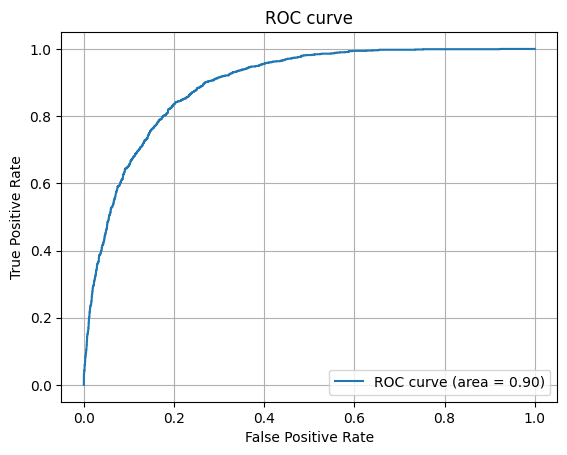

accuracy 0.8556273827283275
precision 0.6832229580573952


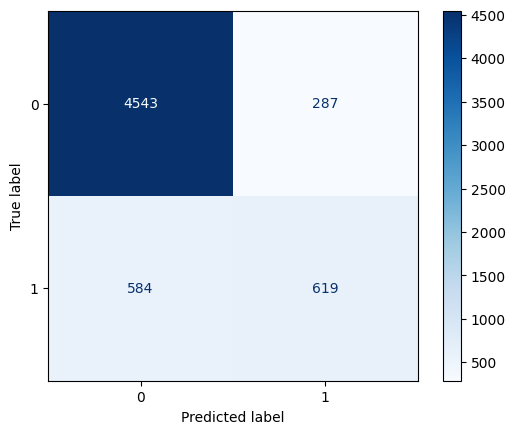

In [21]:
# AUCを計算
fpr, tpr, thresholds = roc_curve(np.asarray(y_test), y_pred)
print("AUC", auc(fpr, tpr))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc(fpr, tpr))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# accuracy, precisionを計算
acc = accuracy_score(np.asarray(y_test), np.round(y_pred))
precision = precision_score(np.asarray(y_test), np.round(y_pred))
print("accuracy", acc)
print("precision", precision)

# 混同行列をプロット
y_pred = np.round(y_pred)
cm = confusion_matrix(np.asarray(y_test), np.where(y_pred < 0.5, 0, 1))
cmp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmp.plot(cmap=plt.cm.Blues)
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

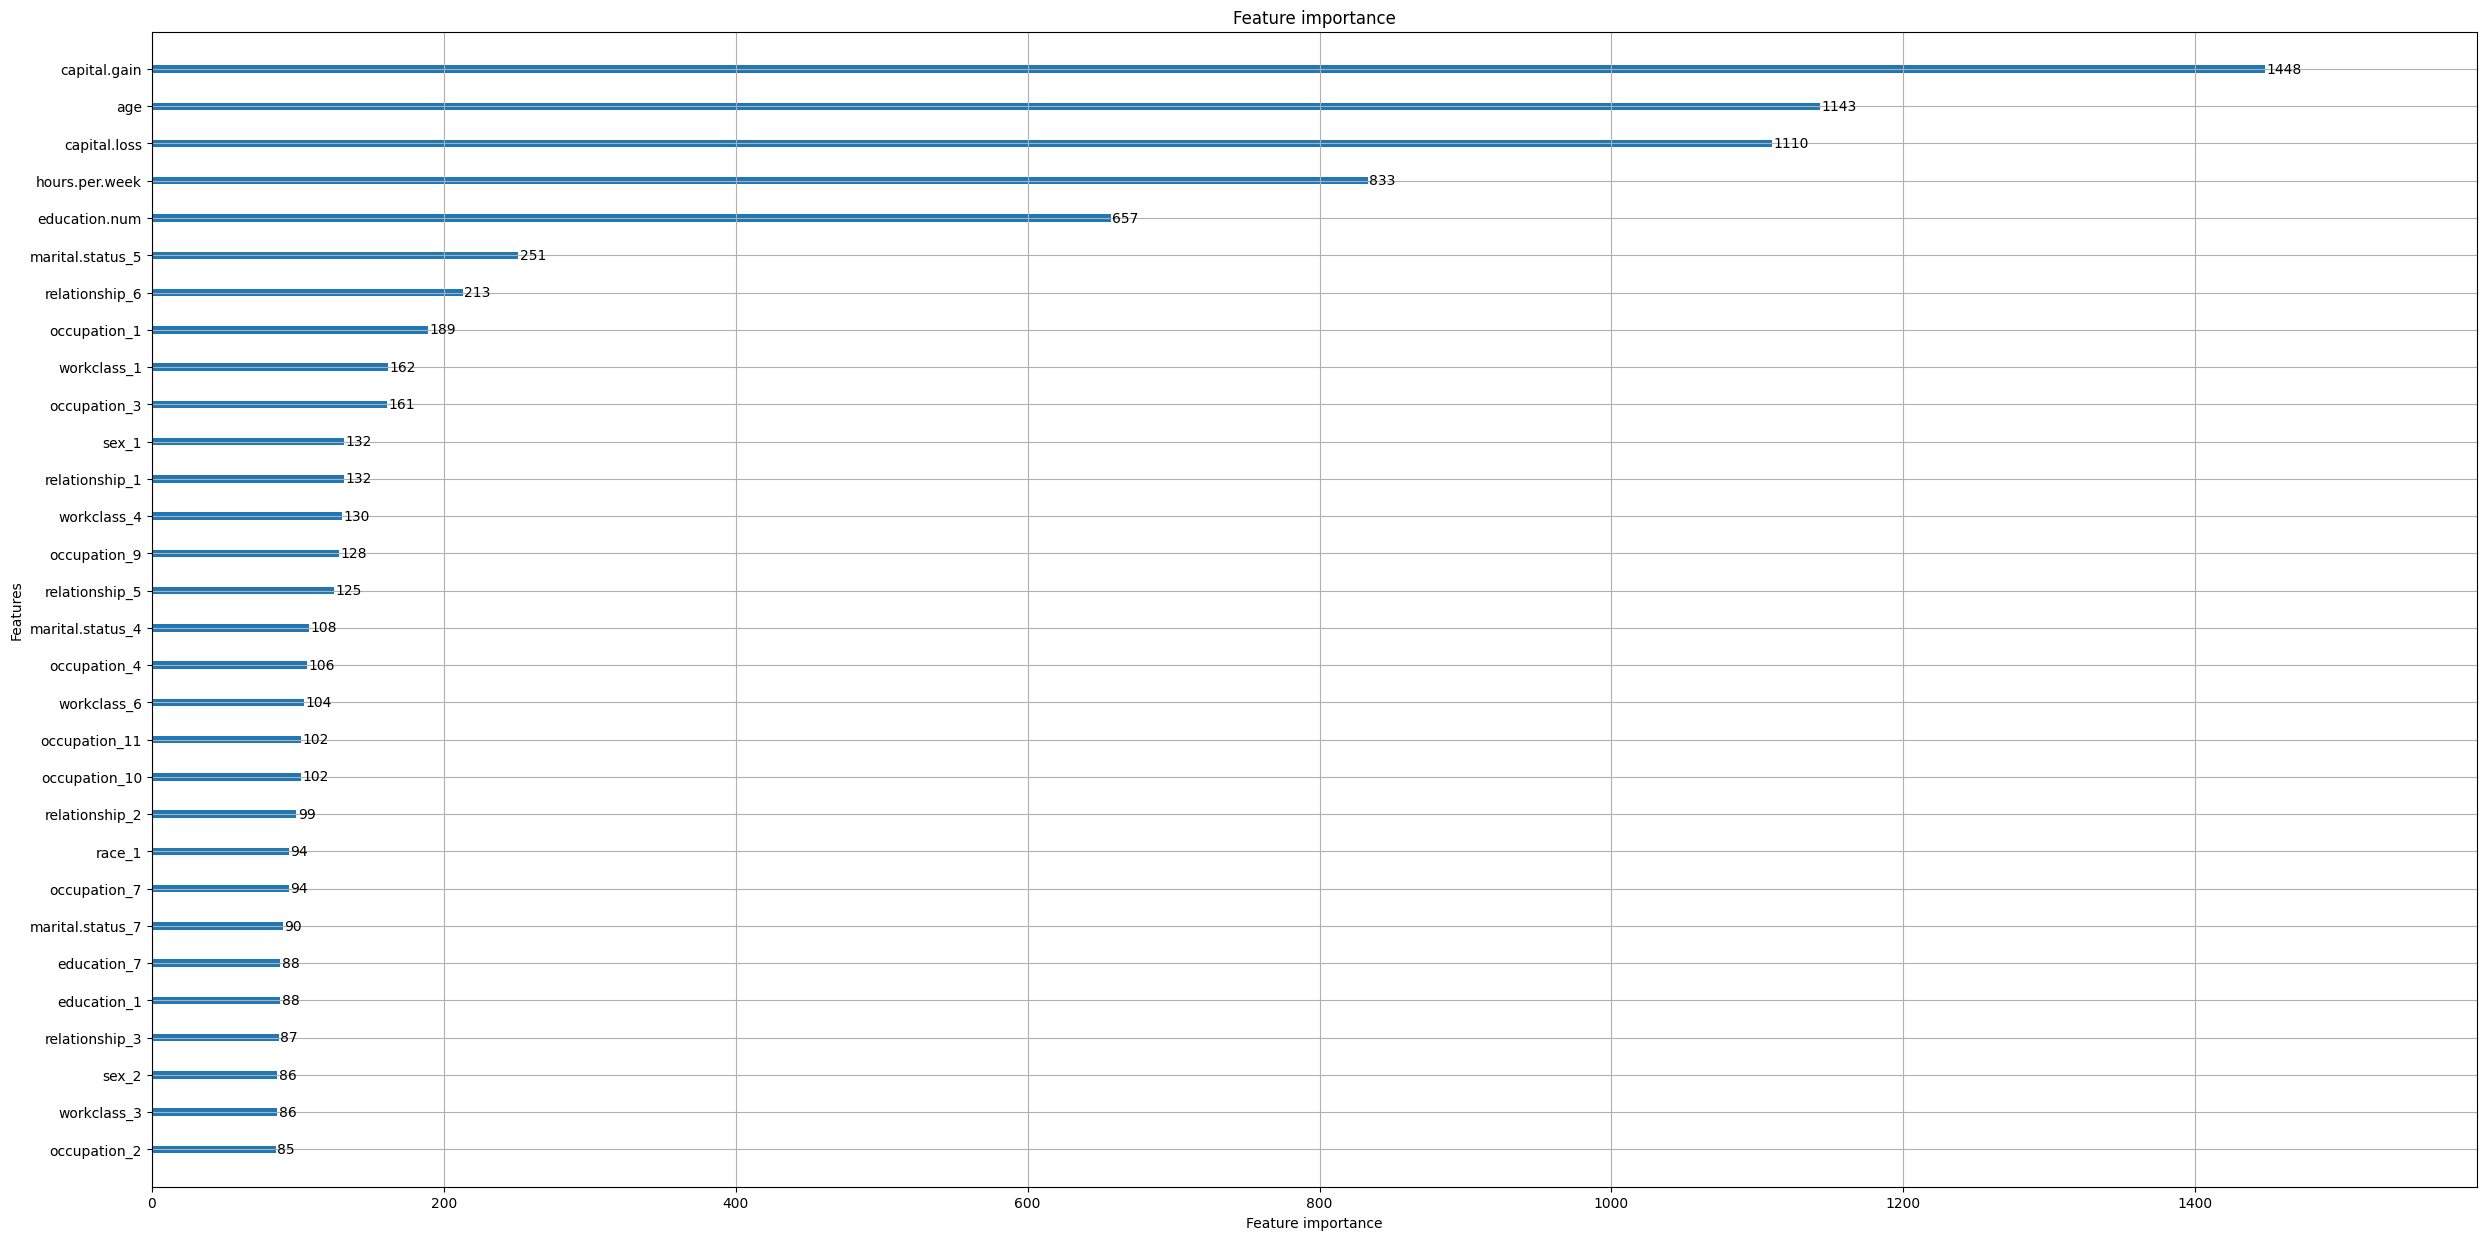

In [22]:
# 重要度としては「特徴量が分岐（ノード）の条件式で使用された回数」（＝デフォルト）
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='split')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

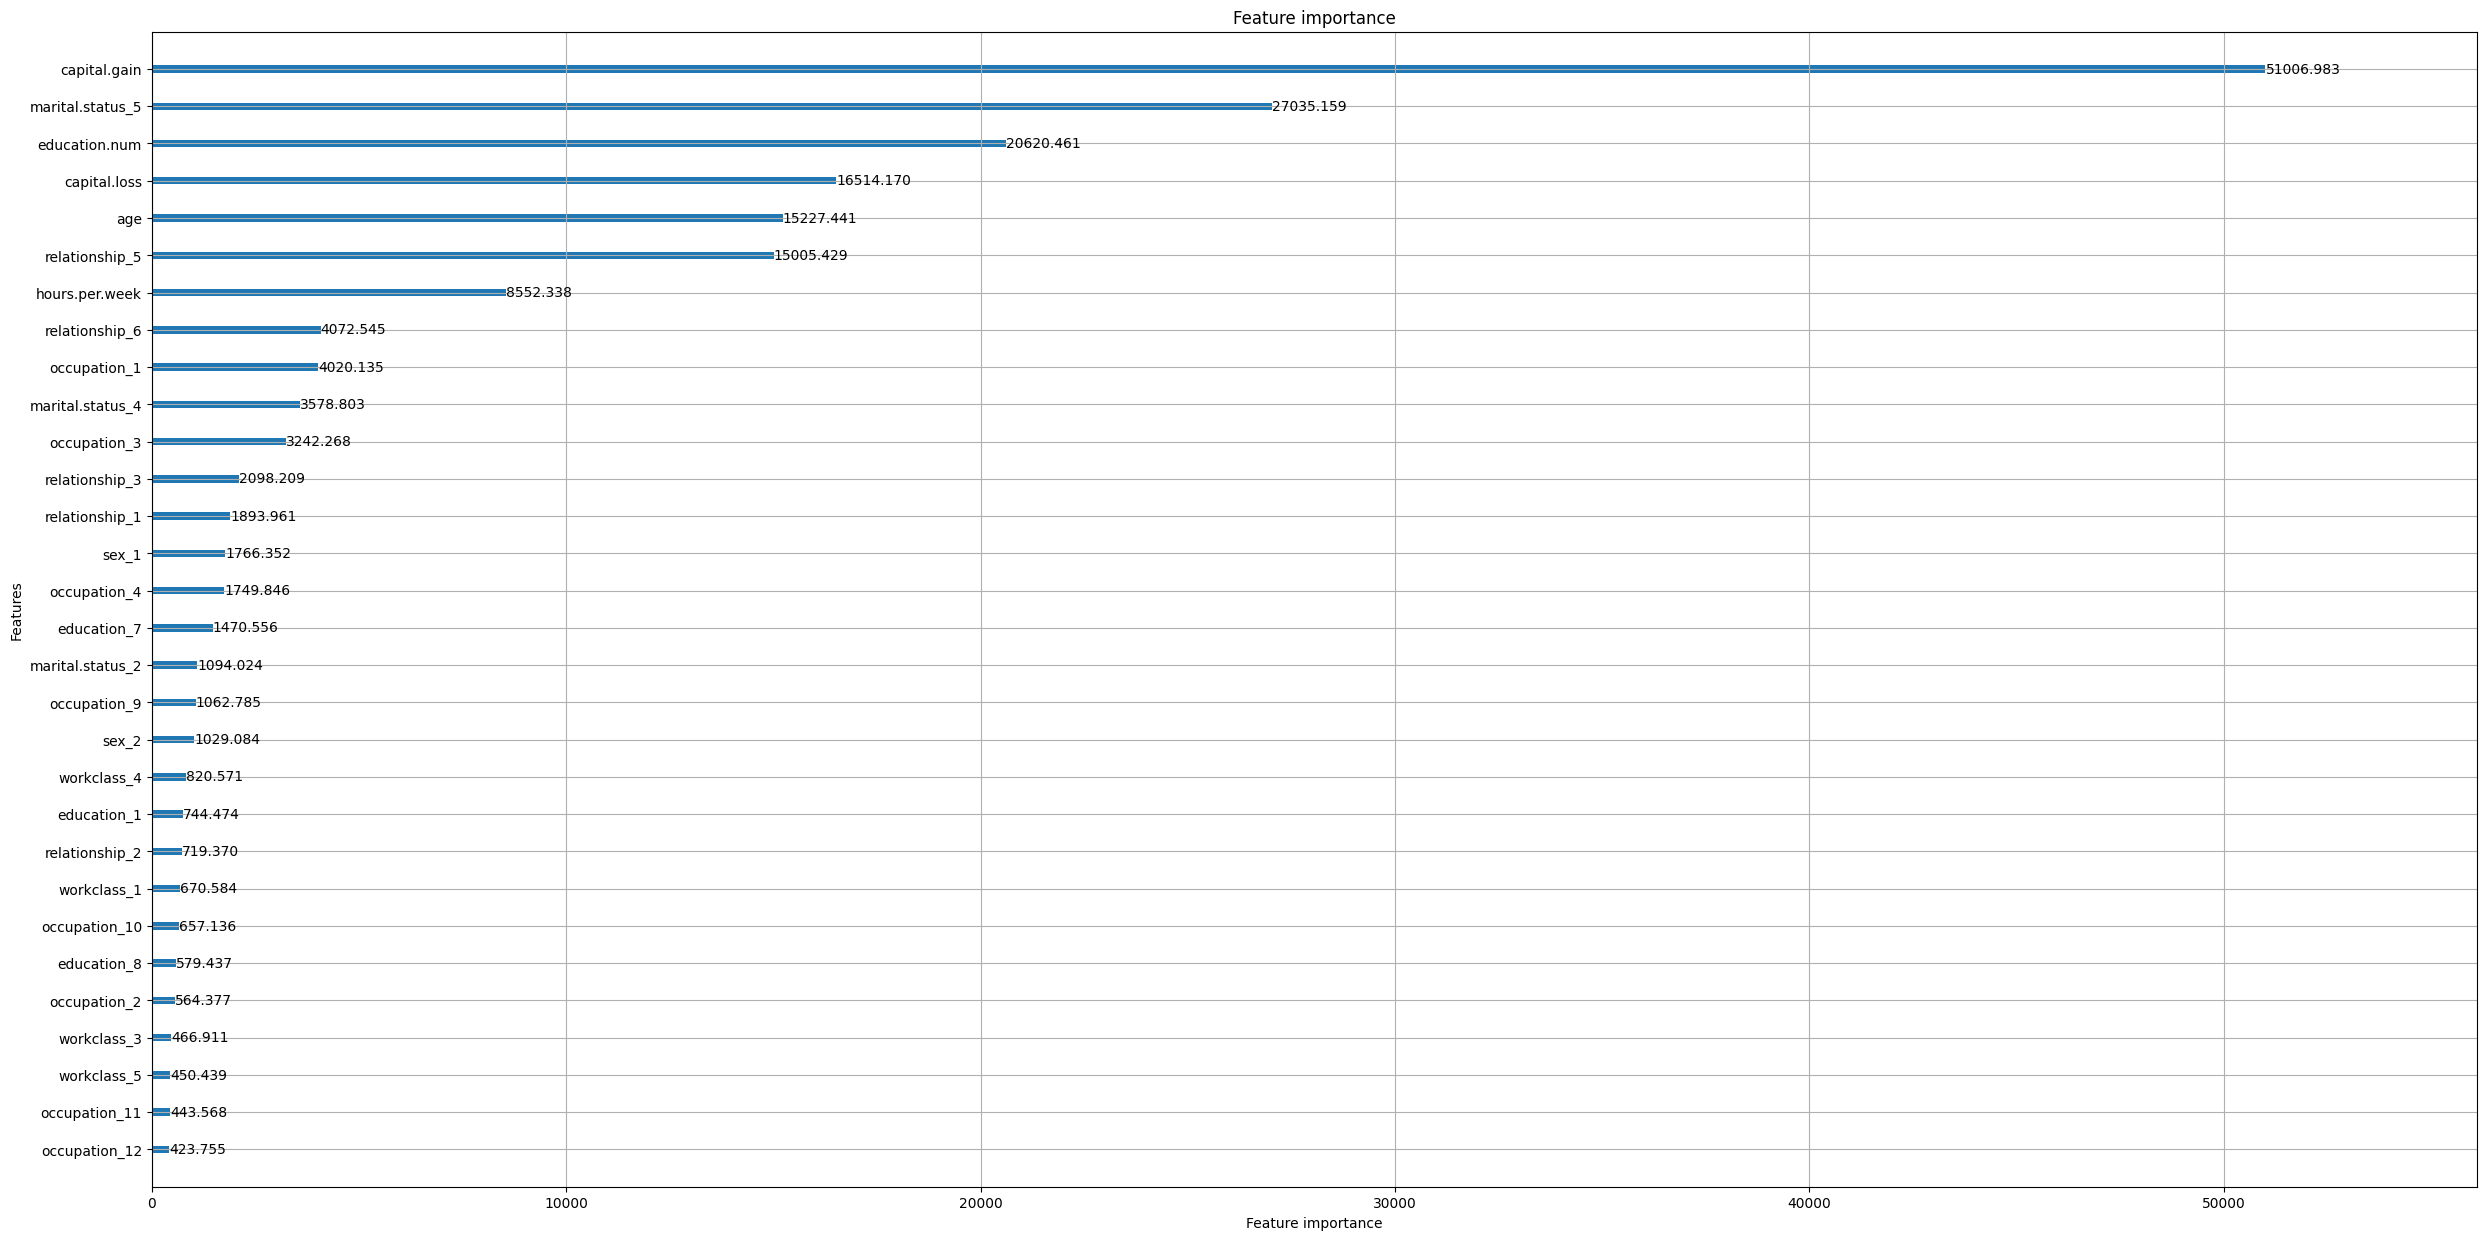

In [23]:
# 重要度としては「特徴量がある分岐（ノード）において目的関数の改善に寄与した度合い」
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='gain')

In [24]:
# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [25]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [26]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df.drop('income',axis=1).columns) # 特徴量名のリスト(目的変数target以外)
# 特徴量重要度の算出方法 'gain'(推奨) : トレーニングデータの損失の減少量を評価
f_importance = np.array(model.feature_importance(importance_type='gain')) # 特徴量重要度の算出 //
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
59,capital.gain,0.263353
29,marital.status_5,0.139585
24,education.num,0.106465
60,capital.loss,0.085264
0,age,0.078620


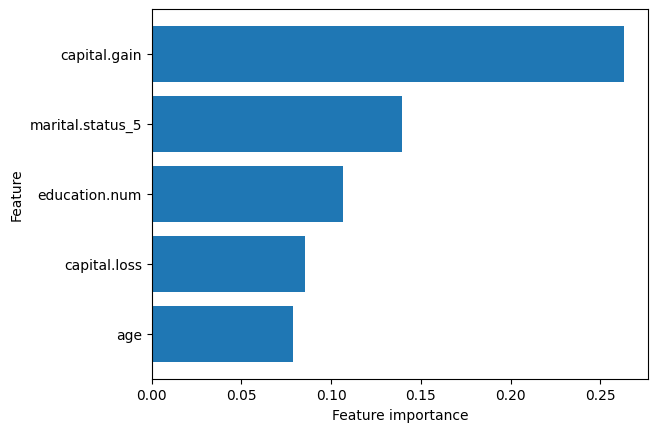

In [27]:
# 特徴量重要度の可視化
n_display = 5 # 上位10個に制限
plot_feature_importance(df_importance.iloc[:n_display,:])

In [28]:
import csv
# 決定木をDataFrameに変換
model.trees_to_dataframe().to_csv('adult_uci_onehot-optuna-再現_decisiontree.csv', index=False, header=True, encoding='UTF-8', sep=',', quoting=csv.QUOTE_ALL)

In [29]:
df_tree = pd.read_csv('adult_uci_onehot-optuna-再現_decisiontree.csv')

In [30]:
df_tree.head(10)

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S4,0-S1,NaN,marital.status_5,2133.550049,1.000000e-35,<=,left,None,-0.961185,0.000000,10588
1,0,2,0-S4,0-L0,0-L5,0-S0,hours.per.week,111.553001,4.250000e+01,<=,left,None,-0.980688,1098.410000,5489
2,0,3,0-L0,NaN,NaN,0-S4,NaN,NaN,NaN,NaN,NaN,NaN,-0.984102,853.072057,4263
3,0,3,0-L5,NaN,NaN,0-S4,NaN,NaN,NaN,NaN,NaN,NaN,-0.968704,245.335759,1226
4,0,2,0-S1,0-S2,0-L2,0-S0,occupation_3,309.483002,1.000000e-35,<=,left,None,-0.940568,1020.360000,5099
5,0,3,0-S2,0-S3,0-S6,0-S1,occupation_1,393.533997,1.000000e-35,<=,left,None,-0.945383,861.677000,4306
6,0,4,0-S3,0-S5,0-L4,0-S2,education_7,139.363007,1.000000e-35,<=,left,None,-0.952263,687.380000,3435
7,0,5,0-S5,0-L1,0-S7,0-S3,age,90.996399,3.550000e+01,<=,left,None,-0.955764,600.132000,2999
8,0,6,0-L1,NaN,NaN,0-S5,NaN,NaN,NaN,NaN,NaN,NaN,-0.967045,192.506526,962
9,0,6,0-S7,0-L6,0-L8,0-S5,education_3,50.093800,1.000000e-35,<=,left,None,-0.950433,407.626000,2037


In [31]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21097 entries, 0 to 21096
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tree_index         21097 non-null  int64  
 1   node_depth         21097 non-null  int64  
 2   node_index         21097 non-null  object 
 3   left_child         9928 non-null   object 
 4   right_child        9928 non-null   object 
 5   parent_index       19856 non-null  object 
 6   split_feature      9928 non-null   object 
 7   split_gain         9928 non-null   float64
 8   threshold          9928 non-null   float64
 9   decision_type      9928 non-null   object 
 10  missing_direction  9928 non-null   object 
 11  missing_type       9928 non-null   object 
 12  value              21097 non-null  float64
 13  weight             21097 non-null  float64
 14  count              21097 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 2.4+ MB
